# implementing principle comaponet analysis

# in this demo , you will be show how to inpmlement PCA using python

# step 1 : import required libraries :`

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2 : Load the data ires file

In [6]:
ires_data = pd.read_csv("iris.csv")
ires_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print("row and column is : ",ires_data.shape)

row and column is :  (150, 6)


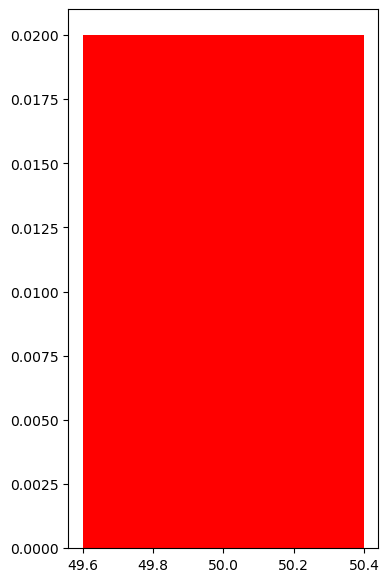

In [8]:
 # target variable 

species = ires_data.Species.value_counts()
target_ration = species.value_counts()/len(ires_data)

plt.figure(figsize=(4,7))
plt.bar(target_ration.index,target_ration,color="red")
plt.show()

# step 3 : feature selection`

In [12]:
x = ires_data.drop(columns=["Species"]).values
y = ires_data.Species.values

# Step 4 : Projection of PCA to 2D

In [15]:
# data.enplained_variance_ratio_

In [24]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

principalDF = pd.DataFrame(data=x_pca, columns=["prencipal componet 1","prencipal componet 2"])
principalDF

,prencipal componet 1,prencipal componet 2
0,74.547527,0.441426
1,73.549143,0.309342
2,72.557120,0.084528
3,71.551791,0.160353
4,70.552763,0.227636
...,...,...
145,-70.519741,-0.954230
146,-71.501906,-1.460988
147,-72.510533,-1.218025
148,-73.515887,-1.165059


# step 5 : concatenating DataFrame along axis=1

In [20]:
finalDF = pd.concat([principalDF,ires_data["Species"]],axis=1)
finalDF

,prencipal componet 1,prencipal componet 2,Species
0,74.547527,0.441426,Iris-setosa
1,73.549143,0.309342,Iris-setosa
2,72.557120,0.084528,Iris-setosa
3,71.551791,0.160353,Iris-setosa
4,70.552763,0.227636,Iris-setosa
...,...,...,...
145,-70.519741,-0.954230,Iris-virginica
146,-71.501906,-1.460988,Iris-virginica
147,-72.510533,-1.218025,Iris-virginica
148,-73.515887,-1.165059,Iris-virginica


# step 6: Visualize 2D Projection

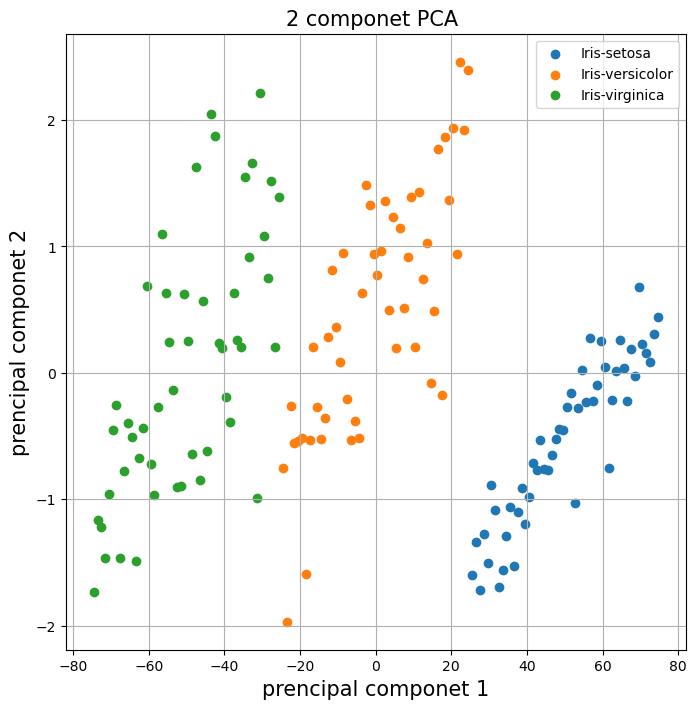

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("prencipal componet 1",fontsize=15)
ax.set_ylabel("prencipal componet 2",fontsize=15)
ax.set_title("2 componet PCA ",fontsize=15)

targets =(["Iris-setosa","Iris-versicolor","Iris-virginica"])

for target in targets:
    indiesTokeep = finalDF["Species"]==target
    ax.scatter(finalDF.loc[indiesTokeep,"prencipal componet 1"],
              finalDF.loc[indiesTokeep,"prencipal componet 2"])
    
ax.legend(targets)
ax.grid()

# step 7 : Calculating Explained Ratio

In [26]:
pca.explained_variance_ratio_

array([9.99319101e-01, 5.14403271e-04])

In [30]:
pca = PCA(0.95)
prencipal_Componet = pca.fit_transform(x)

In [32]:
# print(x_train.shape,x_test.shape,x.shape)

In [34]:
pca.n_components_

1

In [36]:
principalDF = pd.DataFrame(data=prencipal_Componet, columns=["prencipal componet 1"])
principalDF

,prencipal componet 1
0,74.547527
1,73.549143
2,72.557120
3,71.551791
4,70.552763
...,...
145,-70.519741
146,-71.501906
147,-72.510533
148,-73.515887


In [27]:
pca.explained_variance_ratio_

array([0.9993191])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model= LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0